In [1]:
## K-Center and MEB Testing
## Karan Vombatkere, Dec 2021

#Imports
import numpy as np
import pandas as pd

import sys
sys.path.append('../algorithms/')

import coreset_util as c_util
import coreset_kcenter as c_kcenter
import coreset_meb as c_meb
import helper_functions as hf

In [2]:
#Function to import data from data folder
def import_dataset(dataset_name, col_list, sep):
    '''
    Import input data from data folder
    Args:
        dataset_name: csv file name, stored in data folder
        col_list: list of columns to compute Coreset on
    '''
    coreset_data = c_util.Coreset_Util(dataset_name, col_list, sep)
    test_data = coreset_data.X_array

    return test_data


#Code to run k-center implementation and return metrics
def run_kcenter(x_arr, k_val, epsilon, plot_flag):
    '''
    Test kcenter class and generate relevant metrics on input data
    Args:
        x_arr: input data - numpy ndarray
        k_val: k value for number of cluster centers
        epsilon: epsilon value
    '''    
    #Initialize kcenter coreset object with parameters
    print("============================================================================")
    kcenter_obj = c_kcenter.Coreset_kCenter(x_arr, k_val, epsilon, plot_flag)
    computed_coreset = kcenter_obj.compute_kCenter_Coreset()

    kcenter_cost = kcenter_obj.R_val
    min_range = (1-epsilon)*kcenter_cost
    max_range = (1+epsilon)*kcenter_cost

    #Initialize kcenter coreset object with coreset
    print("---------------------------------------------------------------------------")
    print('Computing centers on Coreset')
    kcenter_coreset_obj = c_kcenter.Coreset_kCenter(computed_coreset, k_val, epsilon, plot_flag)
    kcenter_coreset_obj.greedy_kcenter()
    kcenter_coreset_obj.plot2D_coreset(True)
    coreset_kcenter_cost = kcenter_coreset_obj.R_val

    print("(1+e) approximation range = [{:.3f}, {:.3f}]".format(min_range, max_range))

    return kcenter_cost, coreset_kcenter_cost
    



In [3]:
#Finland user location data
dataset_name = 'finlandUserLocations.txt'
user_locs = import_dataset(dataset_name, col_list=None, sep='\t')

#Convert to lat/long
user_locs = user_locs/10000

Imported dataset: finlandUserLocations.txt


In [4]:
# generate 5 gaussian clusters
rng = np.random.default_rng(12345)

means1 = [[5, 5], [-6, -4], [0, 0], [8,8], [4,-2]]
covs1 = [np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 1]]), np.array([[7, 0], [0, 1]]), np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 1]])]
gaussian_stream = hf.simulate_gaussian_clusters(rng, [2000, 2000, 2000, 2000, 2000], 5, means1, covs1)

----------------------------------------------------------------------------------------------
Computing k-center Coreset for k=5, epsilon=0.1, d=2
Cost (max) of k-center clustering=3.172


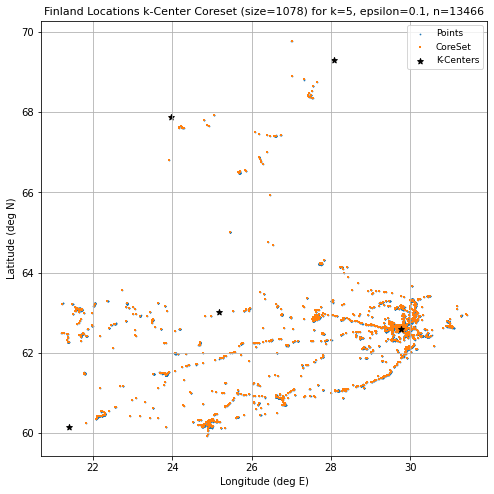

Generated (k,epsilon) Center Coreset of size=1078 on Input dimensions=(13466, 2)
Coreset computation time = 0.7 seconds
----------------------------------------------------------------------------------------------
---------------------------------------------------------------------------
Computing centers on Coreset
Cost (max) of k-center clustering=3.308


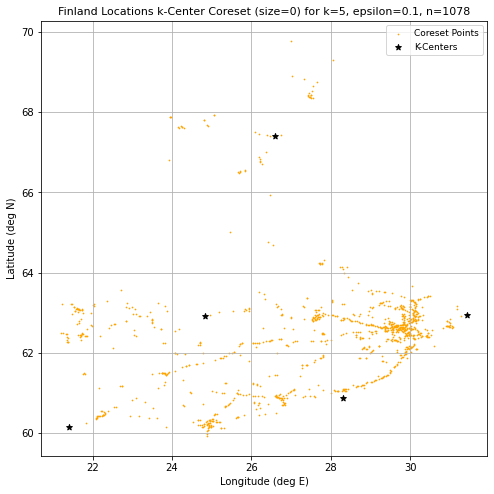

(1+e) approximation range = [2.854, 3.489]
----------------------------------------------------------------------------------------------
Computing k-center Coreset for k=5, epsilon=0.1, d=2
Cost (max) of k-center clustering=3.172


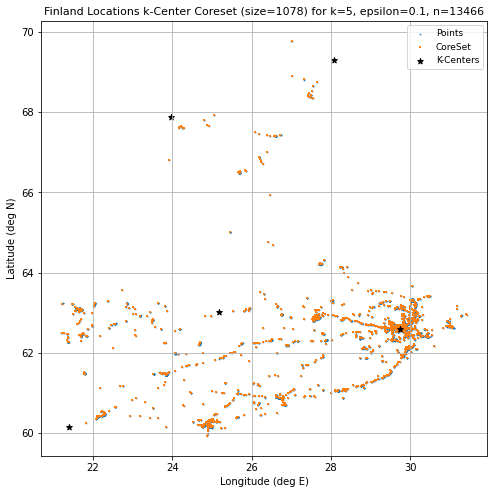

Generated (k,epsilon) Center Coreset of size=1078 on Input dimensions=(13466, 2)
Coreset computation time = 0.6 seconds
----------------------------------------------------------------------------------------------
---------------------------------------------------------------------------
Computing centers on Coreset
Cost (max) of k-center clustering=3.172


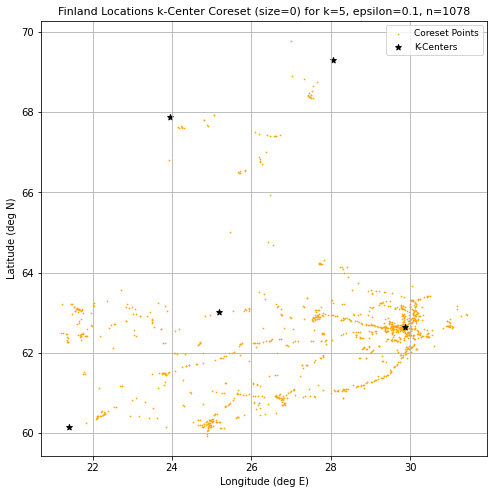

(1+e) approximation range = [2.854, 3.489]


In [7]:
#Specify testing parameters
# dataset_name = 'UNdata_CO2Emissions.csv'
# col_list = ['Year', 'Value']
# UN_data = import_dataset(dataset_name, col_list)

#Specify parameters
k = 5
epsilon = 0.1
num_iterations = 2

k_center_costs = []
coreset_costs = []

for i in range(num_iterations):
    #Run k-center
    k_center_cost,c = run_kcenter(user_locs, k, epsilon, plot_flag = True)
    k_center_costs.append(k_center_cost)
    coreset_costs.append(c)


In [6]:
np.mean(k_center_costs)

3.5355507391081678

In [ ]:
np.mean(coreset_costs)

In [ ]:
#Test kcenter on synthetic random data
# x_arr = []
# for i in range(1000):
#     x_val, y_val, z_val = np.random.randint(-100,101), np.random.randint(-100,101), np.random.randint(-100,101)
#     x_arr.append([x_val, y_val, z_val])

test_kcenter = c_kcenter.Coreset_kCenter(gaussian_stream, 5, 0.4, True)
test_coreset = test_kcenter.compute_kCenter_Coreset()


In [ ]:
#Test MEB on synthetic data
eps=0.05
plotting=True

x_arr = []

# for i in range(10000):
#     x_val, y_val = np.random.normal(5,10), np.random.normal(0,4)
#     x_arr.append([x_val, y_val])

for i in range(10000):
    x_val, y_val,  = np.random.randint(-100,101), np.random.randint(-100,101)
    x_arr.append([x_val, y_val])

meb_test = c_meb.Coreset_MinimumEnclosingBall(x_arr, eps, plotting)
meb_test.compute_minimumEnclosingBall()